<a href="https://colab.research.google.com/github/AnguieGarciaB/TopicosAvanzadosAnalitica/blob/main/exercises/E5-NeuralNetworksKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 5
## Neural Networks in Keras

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
plots_df = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots_df

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [5]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

### Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Remover stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def stem_tokens(tokens):
    # Stemming de las palabras
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

In [35]:
def preprocess(text):
    text = text.lower() # Convertir texto a minúsculas
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # Remover caracteres que no sean letras ni números
    text = re.sub(r'[^\w\s]', '', text) # Remover signos de puntuación
    tokens = remove_stopwords(text)  # Remover stop words
    tokens = stem_tokens(tokens) # Stemming de las palabras
    processed_text = ' '.join(tokens) # Unir los tokens nuevamente en texto
    return processed_text

In [36]:
plots = plots_df.apply(preprocess)

In [37]:
plots

3107    stori singl father take eight year old son wor...
900     serial killer decid teach secret satisfi caree...
6724    sweden femal blackmail disfigur facial scar me...
4704    friday afternoon new york presid tredway corpo...
2582    los angel editor publish hous carol hunnicut g...
                              ...                        
8417    marriag wed lesson number one newli engag coup...
1592    wander barbarian conan alongsid goofi rogu pal...
1723    like tale spun scheherazad kismet follow remar...
7605    mrs brisbi widow mous live cinder block childr...
215     tinker bell journey far north never land patch...
Name: plot, Length: 7895, dtype: object

In [54]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [61]:
# Inicializar y ajustar el tokenizador
tokenizer = Tokenizer()
tokenizer.fit_on_texts(plots)

In [63]:
# Obtener el vocabulario y asignar un índice único a cada palabra
vocabulary = tokenizer.word_index
# Convertir el texto en secuencias de índices
X_secuencias = tokenizer.texts_to_sequences(plots)

In [66]:
# Longitud máxima de la secuencia (en este caso, sería el número máximo de palabras en una oración)
max_len = max(len(seq) for seq in X_secuencias)
max_len

818

In [72]:
# Rellenar o truncar las secuencias para que tengan la misma longitud
X_pad = pad_sequences(X_secuencias, maxlen=max_len)
X_pad

array([[    0,     0,     0, ...,  3751,  6550,    69],
       [    0,     0,     0, ...,  1112,   494,  1642],
       [    0,     0,     0, ...,     8,    32,  1775],
       ...,
       [    0,     0,     0, ...,   624,    12,   193],
       [    0,     0,     0, ...,    24, 16931,   108],
       [    0,     0,     0, ..., 12913,  3516,  1481]], dtype=int32)

In [73]:
X_pad.shape

(7895, 818)

ejemplo profeeee

In [77]:
X = plots.tolist()
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [78]:
# Max len
max_len = 150
X = [x[:max_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [79]:
from keras.utils import pad_sequences
X_pad = pad_sequences(X, maxlen=max_len)
X_pad

array([[11,  7,  2, ...,  1, 24,  7],
       [ 0,  0,  0, ...,  4,  9, 25],
       [11, 16,  4, ..., 17, 20, 23],
       ...,
       [ 0,  0,  0, ..., 19, 21, 10],
       [ 1,  9, 11, ..., 24, 13,  2],
       [ 0,  0,  0, ...,  9,  4,  4]], dtype=int32)

In [80]:
X_pad.shape

(7895, 150)

### Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

In [68]:
!pip install livelossplot --quiet

In [82]:
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Embedding
from keras.utils import pad_sequences
from keras.models import Sequential
from keras import backend as K
from livelossplot import PlotLossesKeras

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [87]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 128)          3584      
                                                                 
 lstm_2 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24225 (94.63 KB)
Trainable params: 24225 (94.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


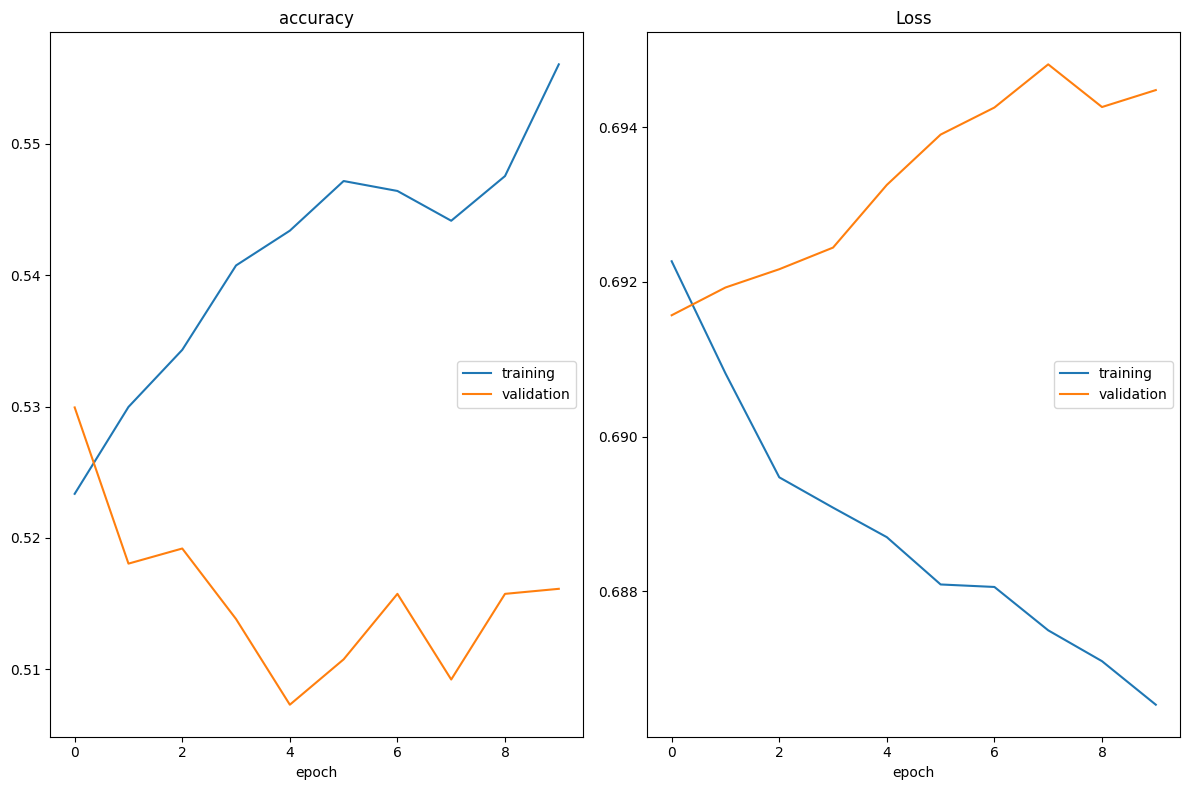

accuracy
	training         	 (min:    0.523, max:    0.556, cur:    0.556)
	validation       	 (min:    0.507, max:    0.530, cur:    0.516)
Loss
	training         	 (min:    0.687, max:    0.692, cur:    0.687)
	validation       	 (min:    0.692, max:    0.695, cur:    0.694)
42/42 [==============================] - 11s 266ms/step - loss: 0.6865 - accuracy: 0.5561 - val_loss: 0.6945 - val_accuracy: 0.5161


In [88]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [75]:
import keras.optimizers as opts
learning_rate = 0.01

K.clear_session()
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(64))  # Agregar una capa LSTM para capturar dependencias de secuencia
model.add(Dropout(0.5))  # Añadir dropout para regularizacióngmoid'))
model.add(Dense(1, activation='sigmoid'))

op = opts.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 818, 128)          3423360   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 3472833 (13.25 MB)
Trainable params: 3472833 (13.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


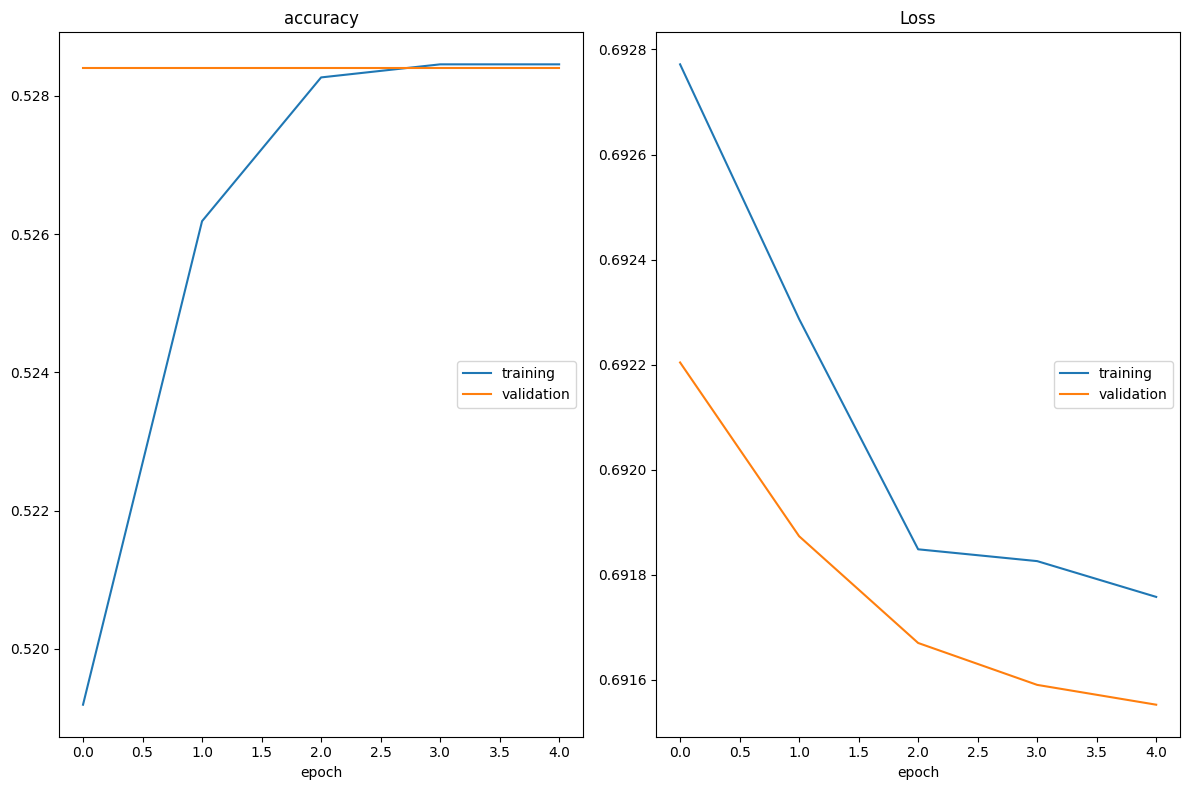

accuracy
	training         	 (min:    0.519, max:    0.528, cur:    0.528)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.692, max:    0.693, cur:    0.692)
	validation       	 (min:    0.692, max:    0.692, cur:    0.692)
42/42 [==============================] - 19s 440ms/step - loss: 0.6918 - accuracy: 0.5285 - val_loss: 0.6916 - val_accuracy: 0.5284


In [47]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=5, verbose=1,
          callbacks=[PlotLossesKeras()])

In [48]:
K.clear_session()
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          3584      
                                                                 
 dense (Dense)               (None, 150, 256)          33024     
                                                                 
 dense_1 (Dense)             (None, 150, 128)          32896     
                                                                 
 dense_2 (Dense)             (None, 150, 64)           8256      
                                                                 
 dense_3 (Dense)             (None, 150, 1)            65        
                                                                 
Total params: 77825 (304.00 KB)
Trainable params: 77825 (304.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


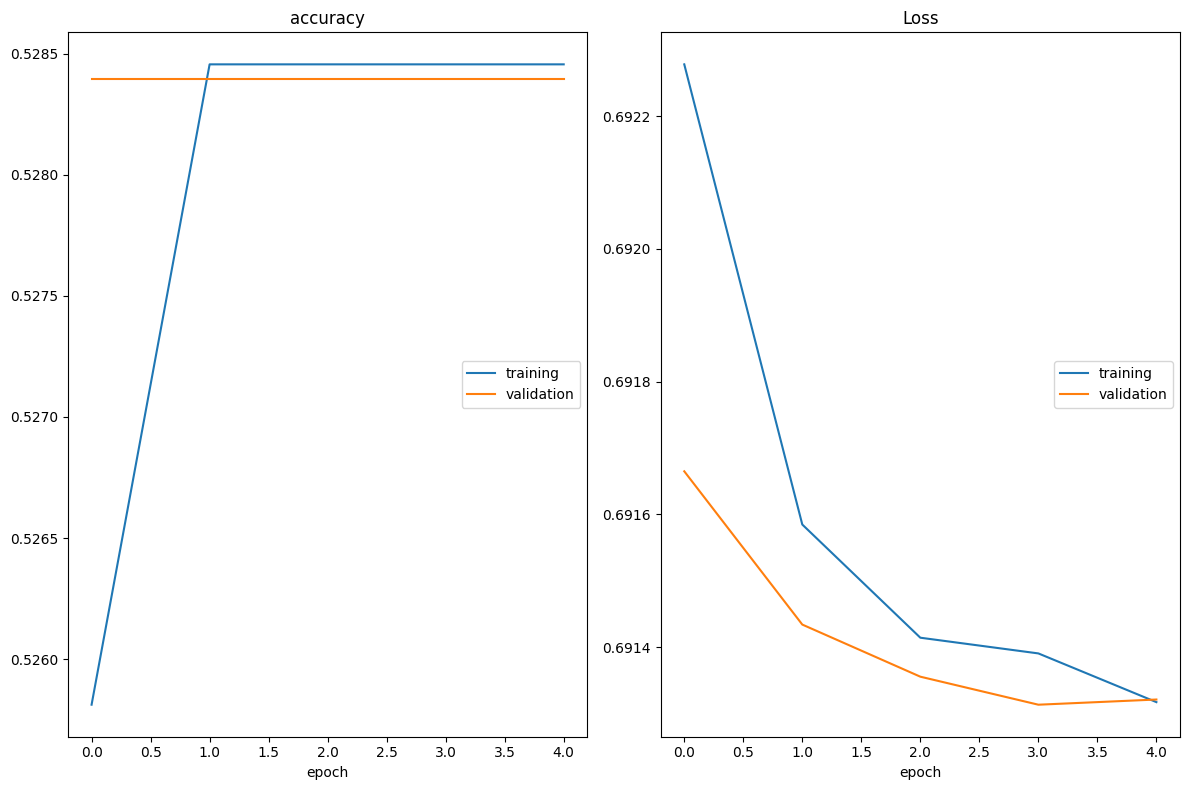

accuracy
	training         	 (min:    0.526, max:    0.528, cur:    0.528)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.691, max:    0.692, cur:    0.691)
	validation       	 (min:    0.691, max:    0.692, cur:    0.691)
166/166 [==============================] - 12s 74ms/step - loss: 0.6913 - accuracy: 0.5285 - val_loss: 0.6913 - val_accuracy: 0.5284


In [49]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          epochs=5, verbose=1,
          callbacks=[PlotLossesKeras()])

In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=5, verbose=1,
          callbacks=[PlotLossesKeras()])

# 5.2 Decision Boundary --  Moons Dataset

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

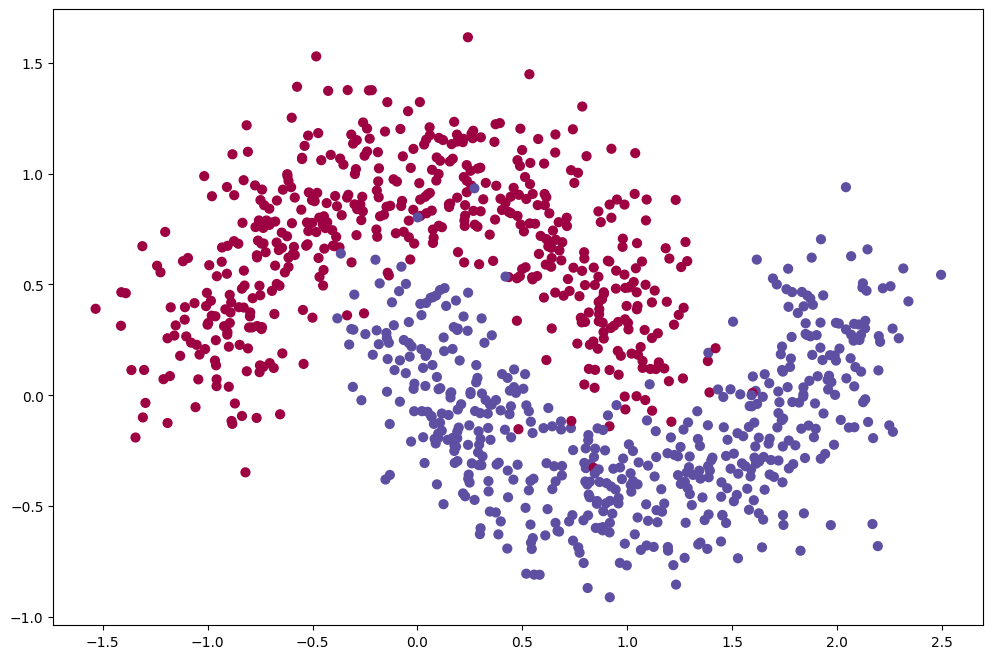

In [100]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [118]:
x_train

array([[ 0.55356914, -0.37596172],
       [ 0.98105873, -0.28467913],
       [ 1.87345298,  0.43682194],
       ...,
       [ 0.04851258,  0.90561169],
       [ 0.43233063, -0.45949733],
       [ 1.73748601, -0.11214153]])

In [113]:
# Definir el modelo
model = Sequential([
    Dense(32, input_dim=2, activation='relu'),  # Capa oculta con 32 neuronas y función de activación ReLU
    Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona y función de activación sigmoide para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
32/32 [==============================] - 1s 4ms/step - loss: 0.6736 - accuracy: 0.4840
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.6720
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7720
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.8020
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.8120
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8240
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.8370
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3569 - accuracy: 0.8440
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.8520
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.8610
Epoch 11/20
32/32 [

In [114]:
# Evaluar el modelo (opcional)
loss, accuracy = model.evaluate(x_train, y_train)
print("Accuracy:", accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8820
Accuracy: 0.8820000290870667


In [133]:
x_train[11]

array([-1.00355688,  0.46198182])

In [132]:
y_train[11]

0

In [134]:
xval = np.array([[-1.00355688,  0.46198182]])
model.predict(xval)[0, 0]

1/1 [==============================] - 0s 196ms/step


0.03382819

**Hint:** Use the next function to plt the decision boundary,

1/1 [==============================] - 0s 25ms/step


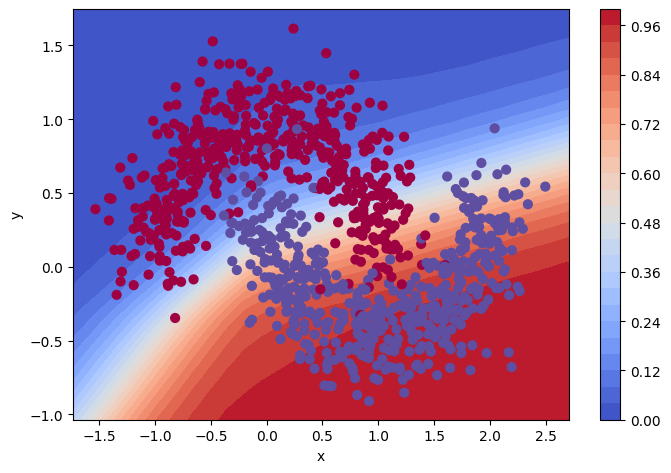

In [137]:
# model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (8,16/3))
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
plot_data(x_train, y_train)